# Binary Classfication

In [1]:
from tensorflow.keras.datasets import imdb

# Data Load

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Data Preprocessing

In [3]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [4]:
print(x_train[0])
print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
(25000, 10000)


In [5]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [6]:
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Build & Train Model

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Why are activation functions necessary?

Without an activation function like 'relu', the Dense layer would only learn linear transformations of input data.  
Such a hypothesis space is too restricted and wouldn't benefit from multiple layers of representations, because a deep stack of linear layers would still implement a linear operation

In [9]:
model.compile(optimizer="rmsprop",
             loss = "binary_crossentropy",
             metrics=['accuracy'])

In [10]:
history_1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5082 - accuracy: 0.7854 - val_loss: 0.3883 - val_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3002 - accuracy: 0.9044 - val_loss: 0.3028 - val_accuracy: 0.8868
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2204 - accuracy: 0.9273 - val_loss: 0.2952 - val_accuracy: 0.8830
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1682 - accuracy: 0.9468 - val_loss: 0.2747 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1372 - accuracy: 0.9559 - val_loss: 0.2813 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1147 - accuracy: 0.9645 - val_loss: 0.3188 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0923 - accuracy: 0.9729 - val_loss: 0.3285 - val_accuracy: 0.8809
Epoch 8/20
30

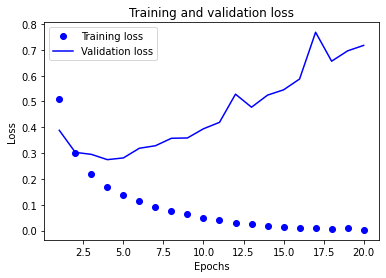

In [11]:
import matplotlib.pyplot as plt

history_dict_1 = history_1.history
loss_values_1 = history_dict_1["loss"]
val_loss_values_1 = history_dict_1["val_loss"]
epochs = range(1, len(loss_values_1) + 1)
plt.plot(epochs, loss_values_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

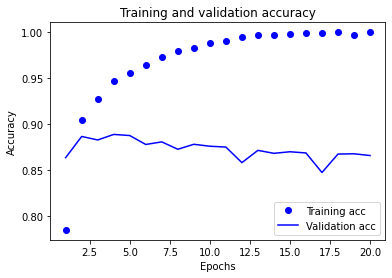

In [12]:
plt.clf()
acc_1 = history_dict_1["accuracy"]
val_acc_1 = history_dict_1["val_accuracy"]
plt.plot(epochs, acc_1, "bo", label="Training acc")
plt.plot(epochs, val_acc_1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- Training loss decrease  
- Training accuracy increase  
Peak at the fourth epoch, after the fourth, -> overfitting  
It means the model ended up learning representations that are specific to the traning data and don't generalize to data outside of the training set  

In [13]:
history_2 = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.9999
Epoch 2/4
30/30 [==============================] - 0s 9ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 3/4
30/30 [==============================] - 0s 9ms/step - loss: 9.7889e-04 - accuracy: 0.9999
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.9544 - accuracy: 0.8493


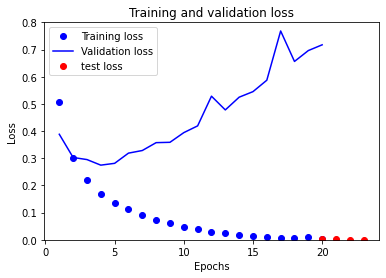

In [14]:
history_dict_1 = history_1.history
loss_values_1 = history_dict_1["loss"]
val_loss_values_1 = history_dict_1["val_loss"]
epochs = range(1, len(loss_values_1) + 1)
plt.plot(epochs, loss_values_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")


history_dict_2 = history_2.history
loss_values_2 = history_dict_2["loss"]
epochs = range(20, 24)
plt.plot(epochs, loss_values_2, "ro", label="test loss")
plt.ylim(0, 0.8)
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

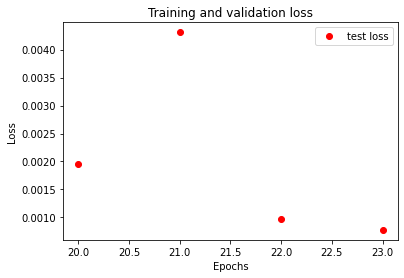

In [15]:
history_dict_2 = history_2.history
loss_values_2 = history_dict_2["loss"]
epochs = range(20, 24)
plt.plot(epochs, loss_values_2, "ro", label="test loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

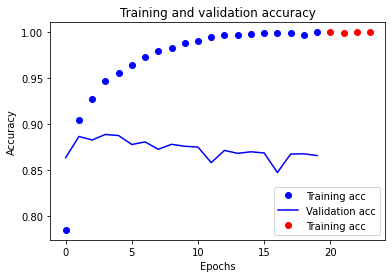

In [16]:
plt.clf()

acc_1 = history_dict_1["accuracy"]
val_acc_1 = history_dict_1["val_accuracy"]
plt.plot(range(0,20), acc_1, "bo", label="Training acc")
plt.plot(range(0,20), val_acc_1, "b", label="Validation acc")

acc_2 = history_dict_2["accuracy"]
plt.plot(range(20,24), acc_2, "ro", label="Training acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
results

[0.9543701410293579, 0.8493199944496155]

In [18]:
model.predict(x_test)

array([[9.5428195e-04],
       [1.0000000e+00],
       [5.7635063e-01],
       ...,
       [1.7150913e-03],
       [2.4144771e-03],
       [5.7413232e-01]], dtype=float32)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4701 - accuracy: 0.8222
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2744 - accuracy: 0.9042
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2089 - accuracy: 0.9255
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2910 - accuracy: 0.8842


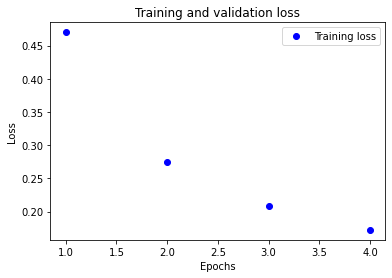

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer="rmsprop",
             loss = "binary_crossentropy",
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/20
49/49 [==============================] - 1s 9ms/step - loss: 0.1648 - accuracy: 0.8126
Epoch 2/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0864 - accuracy: 0.9042
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0617 - accuracy: 0.9281
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0502 - accuracy: 0.9407
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0422 - accuracy: 0.9509
Epoch 6/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0362 - accuracy: 0.9596
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0318 - accuracy: 0.9650
Epoch 8/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0278 - accuracy: 0.9702
Epoch 9/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0246 - accuracy: 0.9736
Epoch 10/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0212 - accuracy: 0.9784
Epoch 11/20
49/49 [

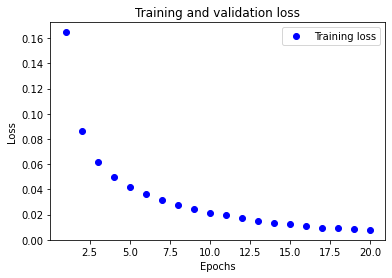

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer="rmsprop",
             loss = "mse",
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()